# Initialization

Test notebook for the C-MAPPS benchmark. Approach using MLP. 

First we import the necessary packages and create the global variables.

In [65]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib
import seaborn as sns
import pandas as pd
import time

import CMAPSAuxFunctions
#import plottingTools
#from datetime import datetime
#from sklearn.covariance import EllipticEnvelope
#from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.dummy import DummyClassifier
#from sklearn.model_selection import train_test_split, cross_validate
#from sklearn.neural_network import MLPClassifier
#from mpl_toolkits.mplot3d import Axes3D
#from dataManagement import DataManagerDamadics
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, Reshape, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras import backend as K

from IPython.display import display, HTML
%matplotlib notebook

num_epoch = 250
batch_size = 512

#min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
standardScaler = StandardScaler()
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

# Retrieve and Reshape data

Get the data from the text files, store it in a Pandas Dataframe and reshape it as appropiately.

In [89]:
datasetNumber = '1'
data_file_train = '../CMAPSSData/train_FD00'+datasetNumber+'.txt'
data_file_test = '../CMAPSSData/test_FD00'+datasetNumber+'.txt'
rul_file = '../CMAPSSData/RUL_FD00'+datasetNumber+'.txt'

constRUL = 105
time_window = 20
window_stride = 2
rul_vector = None

#Selected as per CNN paper
selected_features = ['T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc', 
                     'BPR', 'htBleed', 'W31', 'W32']

nFeatures = len(selected_features)

#Get the X and y matrices with the specified time window
X_train, y_train, _ = CMAPSAuxFunctions.retrieve_and_reshape_data(data_file_train, selected_features, 
                                                                  time_window=time_window, dataset_type='train', 
                                                                  stride=window_stride)
X_test, _, _ = CMAPSAuxFunctions.retrieve_and_reshape_data(data_file_test, selected_features, 
                                                           time_window=time_window, dataset_type='test')

#Standardize the data
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

#Retrieve the data as Xiang

#X_train, y_train, min_max_scaler = CMAPSAuxFunctions.retrieve_and_reshape_data(data_file_train, selected_features, 
#                                                               time_window, 'train', scaler=min_max_scaler)

#X_test, _ , _ = CMAPSAuxFunctions.retrieve_and_reshape_data(data_file_test, selected_features, 
#                                                        time_window, 'test', scaler=min_max_scaler, fit_transform=False)

y_test = np.loadtxt(rul_file)
y_test = np.array([x if x < constRUL else constRUL for x in y_test])
y_test = np.reshape(y_test, (y_test.shape[0], 1))

In [90]:
print("Training data (X, y)")
print(X_train.shape)
print(y_train.shape)
print("Testing data (X, y)")
print(X_test.shape)
print(y_test.shape)

'''
print("Training data (samples, targets)")
print(samples.shape)
print(targets.shape)
print("Testing data (samples, targets)")
print(samplet.shape)
print(labelt.shape)
'''

print("Training data (X, y)")
print(X_train[:5,:])
print(y_train[:5,:])
print("Testing data (X, y)")
print(X_test[:5,:])
print(y_test[:5,:])

'''
print("Training data (samples, targets)")
print(samples[:5,:])
print(targets[:5])
print("Testing data (samples, targets)")
print(samplet[:5,:])
print(labelt[:5])

print("Training data (X, y)")
print(X_train[-5:,:])
print(y_train[-5:,:])
print("Testing data (X, y)")
print(X_test[-5:,:])
print(y_test[-5:,:])

print("Training data (samples, targets)")
print(samples[-5:,:])
print(targets[-5:])
print("Testing data (samples, targets)")
print(samplet[-5:,:])
print(labelt[-5:])
'''

Training data (X, y)
(9390, 280)
(9390, 1)
Testing data (X, y)
(100, 280)
(100, 1)
Training data (X, y)
[[-0.62199313 -0.07920059 -0.42905692 ... -0.4         0.36
   0.52472609]
 [-0.25773196 -0.16358253 -0.27612574 ... -0.4         0.184
   0.39798638]
 [-0.24398625 -0.41722181 -0.19031436 ... -0.4         0.312
   0.36955878]
 [-0.16838488  0.05008636 -0.54927782 ...  0.          0.088
   0.50370151]
 [-0.41580756 -0.0160375  -0.67544605 ... -0.8         0.328
   0.11637548]]
[[125.]
 [125.]
 [125.]
 [125.]
 [125.]]
Testing data (X, y)
[[-0.12714777 -0.19121638 -0.54715378 ... -0.2         0.008
   0.32691738]
 [ 0.01718213 -0.37132988 -0.03101105 ... -0.6         0.008
   0.05034054]
 [ 0.04467354 -0.10584752 -0.09005947 ...  0.2         0.2
   0.08646728]
 [-0.58075601  0.20503331  0.31096007 ...  0.2        -0.36
   0.03938407]
 [-0.12714777  0.04071058 -0.06839422 ...  0.         -0.088
   0.49422564]]
[[105.]
 [ 98.]
 [ 69.]
 [ 82.]
 [ 91.]]


'\nprint("Training data (samples, targets)")\nprint(samples[:5,:])\nprint(targets[:5])\nprint("Testing data (samples, targets)")\nprint(samplet[:5,:])\nprint(labelt[:5])\n\nprint("Training data (X, y)")\nprint(X_train[-5:,:])\nprint(y_train[-5:,:])\nprint("Testing data (X, y)")\nprint(X_test[-5:,:])\nprint(y_test[-5:,:])\n\nprint("Training data (samples, targets)")\nprint(samples[-5:,:])\nprint(targets[-5:])\nprint("Testing data (samples, targets)")\nprint(samplet[-5:,:])\nprint(labelt[-5:])\n'

# Keras model

We will use a very simple ANN for this example. The model is Dense(ReLU, 100)->Dense(ReLu, 100)->Dense(Linear, 1)

In [91]:
#Clear the previous tensorflow graph
K.clear_session()

def RULmodel_SN_1(input_shape):
    
    print(input_shape)
    
    #Create a sequential model
    model = Sequential()
    
    #Add the layers for the model
    model.add(Dense(250, input_dim=input_shape, activation='relu', kernel_initializer='glorot_normal', name='fc1'))
    model.add(Dropout(0.6))
    #model.add(Dense(50, activation='relu', kernel_initializer='glorot_normal', name='fc2'))
    #model.add(Dense(5, activation='relu', kernel_initializer='glorot_normal', name='fc3'))
    #model.add(Dropout(0.2))
    #model.add(Dense(10, activation='relu', name='fc3'))
    #model.add(Dropout(0.5))
    #model.add(Dense(10, activation='tanh', name='fc4'))
    #model.add(Dropout(0.5))
    model.add(Dense(1, activation='linear', name='out'))
    
    #create a placeholder for the input
    #X_input = Input(shape=(input_shape))
    
    #Create the layers
    #X = Dense(100, activation='relu', name='fc1')(X_input)
    #X = Dense(100, activation='relu', name='fc2')(X)
    #X = Dense(1, activation='linear', name='out')(X)
    
    # Create model. This creates the Keras model instance, you'll use this instance to train/test the model.
    #model = Sequential(inputs = X_input, outputs = X, name='RUL')
    
    return model


def RULModel_CNN_1(input_shape):
    
    #Create a sequential model
    model = Sequential()
    
    print(input_shape)
    
    #Add the layers for the model
    model.add(Conv2D(1, (10,10), input_shape=input_shape, padding='same', kernel_initializer='glorot_normal', activation='relu', name='cl1'))
    model.add(Dropout(0.6))
    model.add(MaxPooling2D(pool_size=5, name='pl1'))
    model.add(Flatten())
    model.add(Dense(20, activation='relu', kernel_initializer='glorot_normal', name='fc1'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear', name='out'))
    
    return model


def RULCNNModel(TW, FeatureN):
    
    input_layer = Input(shape=(TW, FeatureN))
    y = Reshape((TW, FeatureN, 1), input_shape=(TW, FeatureN, ),name = 'Reshape')(input_layer)

    y = Conv2D(FilterN, FilterL, 1, border_mode='same', kernel_initializer='glorot_normal', activation='tanh', name='C1')(y)
    y = Conv2D(FilterN, FilterL, 1, border_mode='same', kernel_initializer='glorot_normal', activation='tanh', name='C2')(y)
    y = Conv2D(FilterN, FilterL, 1, border_mode='same', kernel_initializer='glorot_normal', activation='tanh', name='C3')(y)
    y = Conv2D(FilterN, FilterL, 1, border_mode='same', kernel_initializer='glorot_normal', activation='tanh', name='C4')(y)
    #y = Convolution2D(FilterN, FilterL, 1, border_mode='same', init='glorot_normal', activation='tanh', name='C5')(y)
    #y = Convolution2D(FilterN, FilterL, 1, border_mode='same', init='glorot_normal', activation='tanh', name='C6')(y)
    
    y = Conv2D(1, 3, 1, border_mode='same', kernel_initializer='glorot_normal', activation='tanh', name='Clast')(y)  
    
    y = Reshape((TW,14))(y)
    y = Flatten()(y)
    y = Dropout(0.5)(y)
    
    #y = Dense(100, activation='tanh', init='glorot_normal', activity_regularizer=keras.regularizers.l2(0.01),)(y)
    y = Dense(100,activation='tanh', kernel_initializer='glorot_normal', name='fc')(y)
    y = Dense(1)(y)
    
    model = Model(inputs = input_layer, outputs = y, name='RUL_CNN_Model')
    
    return model

# Fit the keras model
Fit the Keras model to the data and determine its performance.

In [92]:
lrate = LearningRateScheduler(CMAPSAuxFunctions.step_decay)
opt = Adam(lr=0, beta_1=0.5)

#Create the model
modelRULSN = RULmodel_SN_1(X_train.shape[1])

#Compile the model.
modelRULSN.compile(optimizer = opt, loss = "mean_squared_error", metrics = ["mse"])

startTime = time.clock()
#Train the model.
modelRULSN.fit(x = X_train, y = y_train, epochs = 100, batch_size = batch_size, callbacks=[lrate])  
endTime = time.clock()

280
Epoch 1/100
9390/9390 [==============================] - 0s 12us/step - loss: 7307.2059 - mean_squared_error: 7307.2059
Epoch 2/100
9390/9390 [==============================] - 0s 7us/step - loss: 4215.4814 - mean_squared_error: 4215.4814
Epoch 3/100
9390/9390 [==============================] - 0s 7us/step - loss: 2101.4110 - mean_squared_error: 2101.4110
Epoch 4/100
9390/9390 [==============================] - 0s 7us/step - loss: 1419.3049 - mean_squared_error: 1419.3049
Epoch 5/100
9390/9390 [==============================] - 0s 7us/step - loss: 1100.4822 - mean_squared_error: 1100.4822
Epoch 6/100
9390/9390 [==============================] - 0s 7us/step - loss: 853.1140 - mean_squared_error: 853.1140
Epoch 7/100
9390/9390 [==============================] - 0s 7us/step - loss: 685.0256 - mean_squared_error: 685.0256
Epoch 8/100
9390/9390 [==============================] - 0s 7us/step - loss: 594.1376 - mean_squared_error: 594.1376: 0s - loss: 602.4019 - mean_squared_error: 602.40

9390/9390 [==============================] - 0s 7us/step - loss: 365.6254 - mean_squared_error: 365.6254
Epoch 70/100
9390/9390 [==============================] - 0s 7us/step - loss: 358.1788 - mean_squared_error: 358.1788
Epoch 71/100
9390/9390 [==============================] - 0s 7us/step - loss: 351.5398 - mean_squared_error: 351.5398
Epoch 72/100
9390/9390 [==============================] - 0s 7us/step - loss: 359.6427 - mean_squared_error: 359.6427
Epoch 73/100
9390/9390 [==============================] - 0s 7us/step - loss: 360.7513 - mean_squared_error: 360.7513
Epoch 74/100
9390/9390 [==============================] - 0s 7us/step - loss: 358.8431 - mean_squared_error: 358.8431
Epoch 75/100
9390/9390 [==============================] - 0s 7us/step - loss: 354.4653 - mean_squared_error: 354.4653
Epoch 76/100
9390/9390 [==============================] - 0s 7us/step - loss: 356.7067 - mean_squared_error: 356.7067
Epoch 77/100
9390/9390 [==============================] - 0s 8us/step

In [93]:
#Evaluate the model
score = modelRULSN.evaluate(x = X_test, y = y_test)
y_pred = modelRULSN.predict(X_test)
healtScore = CMAPSAuxFunctions.compute_health_score(y_test, y_pred)

print("Root Square Mean Error score: {}".format(np.sqrt(score[0])))
print("Health score: {}".format(healtScore))
print("Elapsed time: {}".format(endTime - startTime))

100/100 [==============================] - 0s 211us/step
Root Square Mean Error score: 15.242419010126753
Health score: [523.63647568]
Elapsed time: 7.570681678822666


# CNN Model
Fit the Keras model to the data using a CNN and determine its performance.

# Initialization

In [71]:
#Create samples and labels matrices to be used with the CNN
X_train_CNN = np.reshape(X_train, newshape=(X_train.shape[0], time_window, int(X_train.shape[1]/time_window), 1))
X_test_CNN = np.reshape(X_test, newshape=(X_test.shape[0], time_window, int(X_test.shape[1]/time_window), 1))
y_train_CNN = np.reshape(y_train, newshape=(y_train.shape[0], -1))
y_test_CNN = np.reshape(y_test, newshape=(y_test.shape[0], -1))

print("Training data (X, y)")
print(X_train_CNN.shape)
print(y_train_CNN.shape)
print("Testing data (X, y)")
print(X_test_CNN.shape)
print(y_test_CNN.shape)

Training data (X, y)
(24477, 20, 14, 1)
(24477, 1)
Testing data (X, y)
(259, 20, 14, 1)
(259, 1)


# Constants

In [72]:
lrate = LearningRateScheduler(CMAPSAuxFunctions.step_decay)
opt = Adam(lr=0, beta_1=0.5)

#Create the model
modelRULCNN = RULModel_CNN_1(X_train_CNN.shape[1:4])

#Compile the model.
modelRULCNN.compile(optimizer = opt, loss = "mean_squared_error", metrics = ["mse"])

startTime = time.clock()
#Train the model.
modelRULCNN.fit(x = X_train_CNN, y = y_train_CNN, epochs = 20, batch_size = batch_size, callbacks=[lrate])  
endTime = time.clock()

(20, 14, 1)
Epoch 1/20
24477/24477 [==============================] - 0s 15us/step - loss: 7796.3417 - mean_squared_error: 7796.3417
Epoch 2/20
24477/24477 [==============================] - 0s 12us/step - loss: 5068.3790 - mean_squared_error: 5068.3790
Epoch 3/20
24477/24477 [==============================] - 0s 11us/step - loss: 2611.4925 - mean_squared_error: 2611.4925
Epoch 4/20
24477/24477 [==============================] - 0s 12us/step - loss: 2205.4823 - mean_squared_error: 2205.4823
Epoch 5/20
24477/24477 [==============================] - 0s 12us/step - loss: 2194.2190 - mean_squared_error: 2194.2190
Epoch 6/20
24477/24477 [==============================] - 0s 12us/step - loss: 2166.7763 - mean_squared_error: 2166.7763
Epoch 7/20
24477/24477 [==============================] - 0s 12us/step - loss: 2121.7019 - mean_squared_error: 2121.7019
Epoch 8/20
24477/24477 [==============================] - 0s 12us/step - loss: 2115.6495 - mean_squared_error: 2115.6495
Epoch 9/20
24477/244

# Reshape data to fit a convNet

In [73]:
#Evaluate the model
score = modelRULCNN.evaluate(x = X_test_CNN, y = y_test_CNN)
y_pred = modelRULCNN.predict(X_test_CNN)
healtScore = CMAPSAuxFunctions.compute_health_score(y_test_CNN, y_pred)

print("Root Square Mean Error score: {}".format(np.sqrt(score[0])))
print("Health score: {}".format(healtScore))
print("Elapsed time: {}".format(endTime - startTime))

259/259 [==============================] - 0s 193us/step
Root Square Mean Error score: 46.035335379186165
Health score: [16158.57924994]
Elapsed time: 6.164857804277176


# Keras model

CNN model. The model is Dense(ReLU, 100)->Dense(ReLu, 100)->Dense(Linear, 1)

In [74]:

FilterN = 10
FilterL = 10
rmse,sco,tm = [], [], []

# Fit the keras model

Fit the Keras model to the data and determine its performance.

In [75]:
#Create samples and labels matrices to be used with the CNN
samples = np.reshape(X_train, newshape=(X_train.shape[0], time_window, int(X_train.shape[1]/time_window)))
samplet = np.reshape(X_test, newshape=(X_test.shape[0], time_window, int(X_test.shape[1]/time_window)))
targets = np.reshape(y_train, newshape=(y_train.shape[0], -1))
labelt = np.reshape(y_test, newshape=(y_test.shape[0], -1))

print("Training data (samples, targets)")
print(samples.shape)
print(targets.shape)
print("Testing data (samples, targets)")
print(samplet.shape)
print(labelt.shape)

Training data (samples, targets)
(24477, 20, 14)
(24477, 1)
Testing data (samples, targets)
(259, 20, 14)
(259, 1)


In [76]:
opt = Adam(lr=0, beta_1=0.5)
#DCNN = Model([input_layer], [y])
DCNN = RULCNNModel(time_window, samples.shape[2])
#DCNN.compile(loss=get_score,optimizer=opt)
DCNN.compile(loss='mean_squared_error',optimizer=opt)
lrate = LearningRateScheduler(CMAPSAuxFunctions.step_decay)


startTime = time.clock()
history = DCNN.fit(samples, targets,nb_epoch=20, batch_size=batch_size,verbose=1, 
                   validation_data=(samplet, labelt), callbacks=[lrate])
endTime = time.clock()

C:\Users\controlslab\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:61: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (10, 1), activation="tanh", name="C1", padding="same", kernel_initializer="glorot_normal")`
C:\Users\controlslab\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:62: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (10, 1), activation="tanh", name="C2", padding="same", kernel_initializer="glorot_normal")`
C:\Users\controlslab\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (10, 1), activation="tanh", name="C3", padding="same", kernel_initializer="glorot_normal")`
C:\Users\controlslab\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (10, 1), activation="tanh", name="C4", padding="same", kernel_initializer="g

Train on 24477 samples, validate on 259 samples
Epoch 1/20
24477/24477 [==============================] - 1s 26us/step - loss: 6700.0201 - val_loss: 3878.5923
Epoch 2/20
24477/24477 [==============================] - 0s 19us/step - loss: 5643.3712 - val_loss: 3389.2671
Epoch 3/20
24477/24477 [==============================] - 0s 19us/step - loss: 5063.5106 - val_loss: 2992.2200
Epoch 4/20
24477/24477 [==============================] - 0s 18us/step - loss: 4564.6948 - val_loss: 2658.6462
Epoch 5/20
24477/24477 [==============================] - 0s 18us/step - loss: 4130.0515 - val_loss: 2377.7090
Epoch 6/20
24477/24477 [==============================] - 0s 19us/step - loss: 3751.5767 - val_loss: 2143.1965
Epoch 7/20
24477/24477 [==============================] - 0s 18us/step - loss: 3422.9959 - val_loss: 1949.7051
Epoch 8/20
24477/24477 [==============================] - 0s 18us/step - loss: 3139.0515 - val_loss: 1792.4382
Epoch 9/20
24477/24477 [==============================] - 0s 18u

In [77]:
#Evaluate the model
score = DCNN.evaluate(samplet, labelt)
y_pred = DCNN.predict(samplet)
healtScore = CMAPSAuxFunctions.compute_health_score(labelt, y_pred)

print("Root Square Mean Error score: {}".format(np.sqrt(score)))
print("Health score: {}".format(healtScore))
print("Elapsed time: {}".format(endTime - startTime))

259/259 [==============================] - 0s 81us/step
Root Square Mean Error score: 37.64401347150962
Health score: [35714.98073066]
Elapsed time: 9.487821599803965


In [87]:
def plotRUL(cycles, rulArray, engineUnit):
    
    plt.clf()
    plt.plot(cycles, rulArray, 'bo-', label='RUL')
    plt.xlabel("Time (Cycle)")
    plt.ylabel("RUL")
    plt.title("Test Engine Unit #{}".format(engineUnit))
    
    plt.show()

<IPython.core.display.Javascript object>


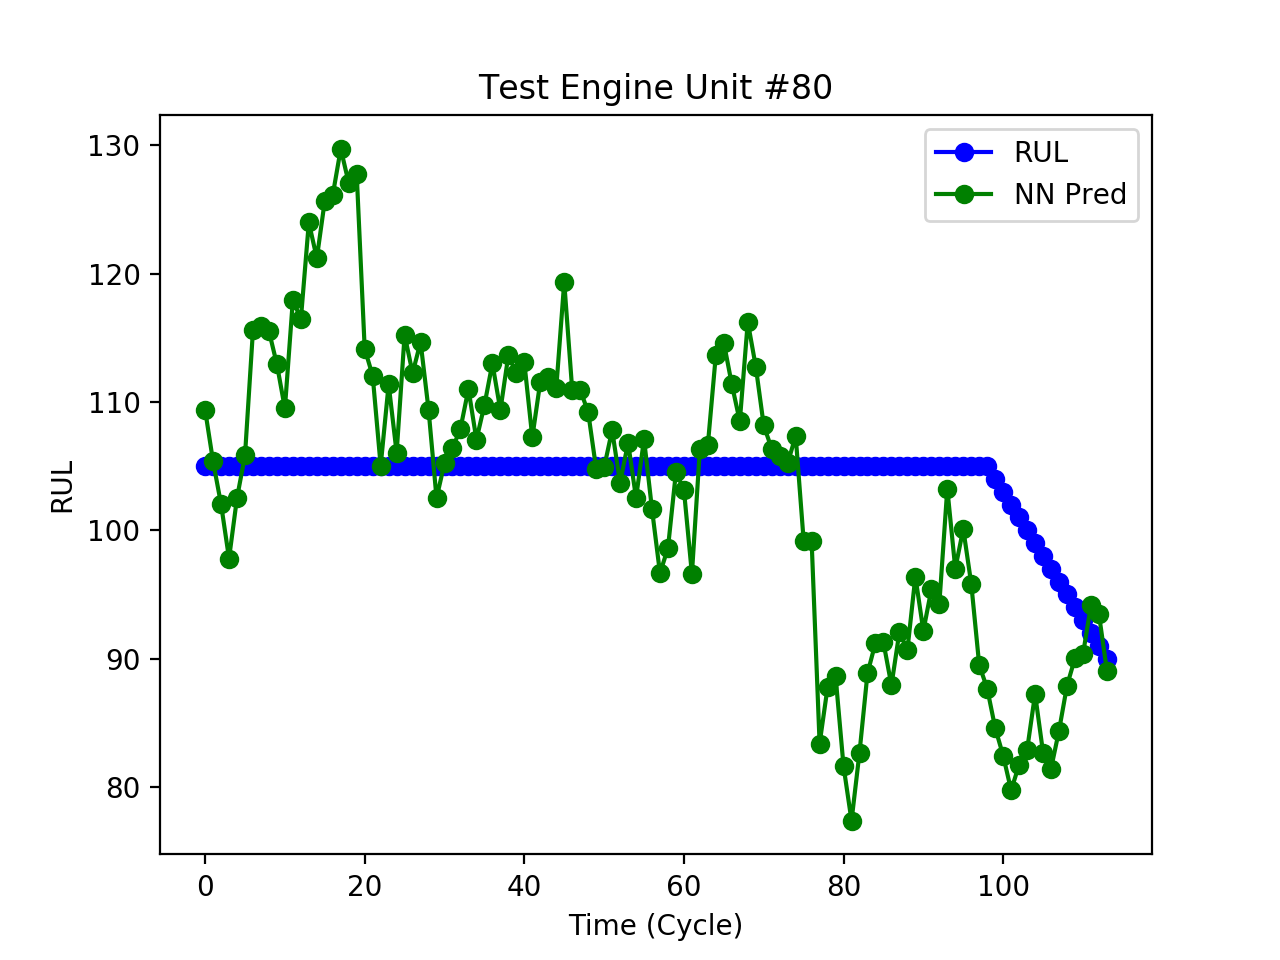

In [94]:
engineUnit = 80

#X_test2, _, _ = CMAPSAuxFunctions.retrieve_and_reshape_data(data_file_test, selected_features, time_window, 
#                                                             'train', scaler=min_max_scaler, fit_transform=False, unit_number=engineUnit)

X_test2, _, _ = CMAPSAuxFunctions.retrieve_and_reshape_data(data_file_test, selected_features, 
                                                                  time_window=time_window, dataset_type='train', 
                                                                  stride=1, unit_number=engineUnit)


#X_test2, _ = CMAPSAuxFunctions.retrieve_and_reshape_data(data_file_test, selected_features, time_window, 'train', unit_number=engineUnit)
X_test2 = min_max_scaler.transform(X_test2)

#samplet2 = np.reshape(X_test2, newshape=(X_test2.shape[0], int(X_test2.shape[1]/nFeatures), nFeatures))

#X_test2_CNN = np.reshape(X_test2, newshape=(X_test2.shape[0], time_window, int(X_test2.shape[1]/time_window), 1))

nnPred = modelRULSN.predict(X_test2)
#dcnnPred = DCNN.predict(samplet2)
#cnnPred = modelRULCNN.predict(X_test2_CNN)

maxCycle = X_test2.shape[0]
faultCycle = y_test[engineUnit-1]
cycles = np.arange(maxCycle)
rulArray = np.arange(faultCycle, maxCycle+faultCycle)
rulArray[rulArray > constRUL] = constRUL
rulArray = np.flipud(rulArray)

'''print("Testing data")
print(X_test2.shape)
print(X_test2[-5:,:])
print(nnPred)
print(cnnPred)'''

plotRUL(cycles, rulArray, engineUnit)
plt.plot(cycles, nnPred, 'go-', label='NN Pred')
#plt.plot(cycles, dcnnPred, 'ro-', label='DCNN Pred')
#plt.plot(cycles, cnnPred, 'yo-', label='CNN Pred')

plt.legend()

